### Importing the Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import operator
%matplotlib inline




### Loading the Pima-indian Dataset 

In [2]:
# read the diabetes csv file into data 
data = pd.read_csv('diabetes.csv')

### View the first 5 rows of the dataset

In [3]:
# showing the first 5 element the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Dimension of dataset i.e total rows and columns

In [4]:
# the total number of columns and rows
data.shape

(768, 9)

### Name of the columns in dataset

In [5]:
# Name of the columns(features) in the data
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Looking for null values are present in the dataset


In [6]:
#check missing values 
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Meta-data information of data like column name, not-null count, datatypes and memory usage

In [7]:
#checking the information about data like column name, not-null count, datatypes and memory usage
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### The basic statistics like central tendency like minimum,maximum,mean,count and standard deviation

In [8]:
# applying the describe() on dataset to know central tendency like minimum,maximum,mean,count and standard deviation
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Exploratory Data Analysis
### As we see in, their are null vaules are presents BMI columns, BMI can not be 0.

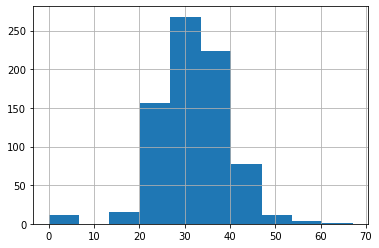

In [9]:
#Histogram of BMI feature since there are some 0 values in data
data['BMI'].hist()
plt.show()

### we are replacing the null values with the mean of the BMI

In [10]:
data['BMI'].replace(0.0,data['BMI'].mean(),inplace=True)


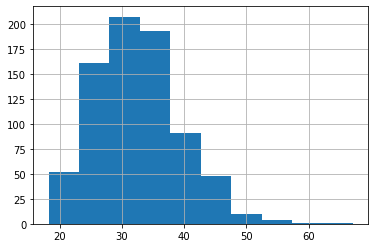

In [11]:
data['BMI'].hist()
plt.show()

### created the weight status colums

In [12]:
# weight status
weight_status = pd.Series([])

<ipython-input-12-0531964a1f79>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  weight_status = pd.Series([])


### categories the BMI column


In [13]:
for i in range(len(data['BMI'])):
    
    if data['BMI'][i] < 18.5:
        weight_status[i] ='Underweight'
    
    elif data["BMI"][i] < 25:
        weight_status[i] ='Normal'
        
    elif data['BMI'][i] >= 25 and data['BMI'][i] < 30:
        weight_status[i] ='Overweight'
    
    elif data['BMI'][i] >= 30:
        weight_status[i] ='Obese'
    
    else:
        weight_status[i] =data['BMI'][i]

### Inserting the column into dataset

In [14]:
 data.insert(6,'weight_status',weight_status)

In [15]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,weight_status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,0,23.3,Normal,0.672,32,1
3,1,89,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,168,43.1,Obese,2.288,33,1


In [16]:
data['weight_status'].value_counts()

Obese          483
Overweight     179
Normal         102
Underweight      4
Name: weight_status, dtype: int64

In [17]:
data[data['Glucose']== 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,weight_status,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,Normal,0.140,22,0
182,1,0,74,20,23,27.7,Overweight,0.299,21,0
342,1,0,68,35,0,32.0,Obese,0.389,22,0
349,5,0,80,32,0,41.0,Obese,0.346,37,1
502,6,0,68,41,0,39.0,Obese,0.727,41,1


### Create OGTT_interpretation  column in dataset

In [18]:
OGTT_interpretation = pd.Series([])

<ipython-input-18-002bd0b3498e>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  OGTT_interpretation = pd.Series([])


### Categories the OGTT_interpretation

In [19]:
for i in range(len(data['Glucose'])):
    if data['Glucose'][i] == 0:
        OGTT_interpretation[i] = "NA"
    
    elif data['Glucose'][i] <= 140:
        OGTT_interpretation[i] = "Normal"
    
    elif data['Glucose'][i] > 140 and data['Glucose'][i] <= 198:
        OGTT_interpretation[i] = "Impared Glucose Tolerance"
        
    elif data['Glucose'][i] > 198:
        OGTT_interpretation[i] = "Diabetic Level"
    
    else:
        OGTT_interpretation[i] = data['Glucose'][i]
        

### Inserting the column into dataset

In [20]:
data.insert(2,"OGTT_interpretation",OGTT_interpretation)

In [21]:
data['OGTT_interpretation'].value_counts(normalize=True)

Normal                       0.743490
Impared Glucose Tolerance    0.248698
NA                           0.006510
Diabetic Level               0.001302
Name: OGTT_interpretation, dtype: float64

In [22]:
data.head()

,Pregnancies,Glucose,OGTT_interpretation,BloodPressure,SkinThickness,Insulin,BMI,weight_status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,Impared Glucose Tolerance,72,35,0,33.6,Obese,0.627,50,1
1,1,85,Normal,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,Impared Glucose Tolerance,64,0,0,23.3,Normal,0.672,32,1
3,1,89,Normal,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,Normal,40,35,168,43.1,Obese,2.288,33,1



Not a single individual from the sample showed OGTT result at "Diabetic levels".

In [23]:
Impaired_Glucose_Tolerance_Diabetic = ((data ['Glucose'] > 140 ) & (data ['Glucose'] <= 198) & (data ['Outcome'] == 1)).sum()
Impaired_Glucose_Tolerance_Diabetic

131


Not every women with impaired glucose tolerance have diabetes. That can show that the ones with impaired glucose tolerance might be in risk of developing diabetes or are diabetic, but not already diagnosed


In [24]:
Noraml_Glucose_level = ((data['Glucose']!=0) & (data['Glucose']<=140) & (data['Outcome'] == 1)).sum()
Noraml_Glucose_level

134

Half of the diabetic women showed normal glucose level. Information regarding drug therapy is needed.

### Create Percentile of skin thickness column

In [25]:
# Create Percentile of skin thickness column

Percentile_skin_thickness = pd.Series([])

<ipython-input-25-de13583705ab>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Percentile_skin_thickness = pd.Series([])


In [26]:
data['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

In [27]:
data['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22     16
40     16
25     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
14      6
16      6
11      6
43      6
45      6
10      5
44      5
48      4
47      4
50      3
49      3
54      2
52      2
7       2
8       2
60      1
56      1
63      1
51      1
99      1
Name: SkinThickness, dtype: int64

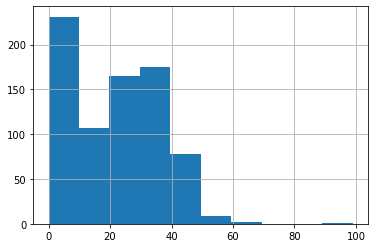

In [28]:
data['SkinThickness'].hist()

### Replacing the null values with mean

In [29]:
data['SkinThickness'].replace(0,data['SkinThickness'].mean(), inplace = True)

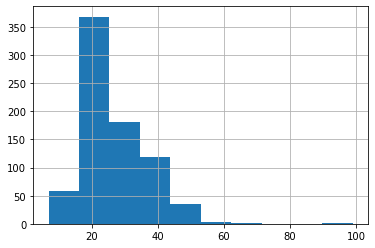

In [30]:
data['SkinThickness'].hist()

### Categories the skin thickness column

In [31]:
#  Check skin fold thickness Percentile

for i in range(len(data)): 
    
    
    if data["Age"][i] >= 20.0 and data["Age"][i] <= 79.0: 
        
    
        if data["SkinThickness"][i] < 11.9: 
            Percentile_skin_thickness[i]="1 <P5th"
        
        elif data["SkinThickness"][i] == 11.9: 
            Percentile_skin_thickness[i]="2 P5th"
        
        elif data["SkinThickness"][i] > 11.9 and data["SkinThickness"][i] < 14.0: 
            Percentile_skin_thickness[i]="3 P5th - P10th"
        
        elif data["SkinThickness"][i] == 14.0: 
            Percentile_skin_thickness[i]="4 P10th"
        
        elif data["SkinThickness"][i] > 14.0 and  data["SkinThickness"][i] < 15.8: 
            Percentile_skin_thickness[i]="5 P10th - P15th"
        
        elif data["SkinThickness"][i] == 15.8: 
            Percentile_skin_thickness[i]="6 P15th"
    
        elif data["SkinThickness"][i] > 15.8 and data["SkinThickness"][i] < 18.0: 
            Percentile_skin_thickness[i]="7 P15th - P25th"
    
        elif data["SkinThickness"][i] == 18.0: 
            Percentile_skin_thickness[i]="8 P25th"
        
        elif data["SkinThickness"][i] > 18.0 and data["SkinThickness"][i] < 23.5: 
            Percentile_skin_thickness[i]="9 P25th - P50th"
   
        elif data["SkinThickness"][i] == 23.5: 
            Percentile_skin_thickness[i]="10 P50th"
        
        elif data["SkinThickness"][i] > 23.5 and data["SkinThickness"][i] < 29.0: 
            Percentile_skin_thickness[i]="11 P50th - P75th"
        
        elif data["SkinThickness"][i] == 29.0: 
            Percentile_skin_thickness[i]="12 P75th"
        
        elif data["SkinThickness"][i] > 29.0 and data["SkinThickness"][i] < 31.9: 
            Percentile_skin_thickness[i]="13 P75th - P85th"
        
        elif data["SkinThickness"][i] == 31.9: 
            Percentile_skin_thickness[i]="14 P85th"
        
        elif data["SkinThickness"][i] > 31.9 and data["SkinThickness"][i] < 33.7: 
            Percentile_skin_thickness[i]="15 P85th - P90th"
    
        elif data["SkinThickness"][i] == 33.7: 
            Percentile_skin_thickness[i]="16 P90th"
        
        elif data["SkinThickness"][i] > 33.7 and data["SkinThickness"][i] < 35.9: 
            Percentile_skin_thickness[i]="17 P90th - P95th"
    
        elif data["SkinThickness"][i] == 35.9: 
            Percentile_skin_thickness[i]="18 P95th"
        
        elif data["SkinThickness"][i] > 35.9: 
            Percentile_skin_thickness[i]="19 >P95th"
            
    elif data["Age"][i] >= 80.0:  #Only 1 woman is 81 years old
        if  data["SkinThickness"][i] > 31.7: 
            Percentile_skin_thickness[i]="20 >P95th"

In [32]:
# Insert new column - Percentile of skin thickness
data.insert(4, "Percentile skin thickness", Percentile_skin_thickness)

In [33]:
data.head()

,Pregnancies,Glucose,OGTT_interpretation,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,weight_status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,Impared Glucose Tolerance,72,17 P90th - P95th,35.000000,0,33.6,Obese,0.627,50,1
1,1,85,Normal,66,12 P75th,29.000000,0,26.6,Overweight,0.351,31,0
2,8,183,Impared Glucose Tolerance,64,9 P25th - P50th,20.536458,0,23.3,Normal,0.672,32,1
3,1,89,Normal,66,9 P25th - P50th,23.000000,94,28.1,Overweight,0.167,21,0
4,0,137,Normal,40,17 P90th - P95th,35.000000,168,43.1,Obese,2.288,33,1


In [34]:
diabetic_malnourished_st = ((data ['SkinThickness'] < 15.8) & (data ['Outcome'] == 1)).sum()
diabetic_malnourished_st

6

In [35]:
diabetic_malnourished_bmi = ((data ['BMI'] < 18.5) & (data ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi

0

In [36]:
diabetic_malnourished_bmi_st = ((data ['BMI'] < 18.5) & (data ['SkinThickness'] < 15.8) & (data ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi_st

0

In [37]:
data[(data['weight_status'] ==  'Normal' ) & (data['Outcome'] == 1 ) ]

,Pregnancies,Glucose,OGTT_interpretation,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,weight_status,DiabetesPedigreeFunction,Age,Outcome
2,8,183,Impared Glucose Tolerance,64,9 P25th - P50th,20.536458,0,23.3,Normal,0.672,32,1
93,4,134,Normal,72,9 P25th - P50th,20.536458,0,23.8,Normal,0.277,60,1
197,3,107,Normal,62,3 P5th - P10th,13.000000,48,22.9,Normal,0.678,23,1
319,6,194,Impared Glucose Tolerance,78,9 P25th - P50th,20.536458,0,23.5,Normal,0.129,59,1
646,1,167,Impared Glucose Tolerance,74,7 P15th - P25th,17.000000,144,23.4,Normal,0.447,33,1
676,9,156,Impared Glucose Tolerance,86,9 P25th - P50th,20.536458,0,24.8,Normal,0.230,53,1
749,6,162,Impared Glucose Tolerance,62,9 P25th - P50th,20.536458,0,24.3,Normal,0.178,50,1


In [38]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Plotting Histogram for each Column in dataset

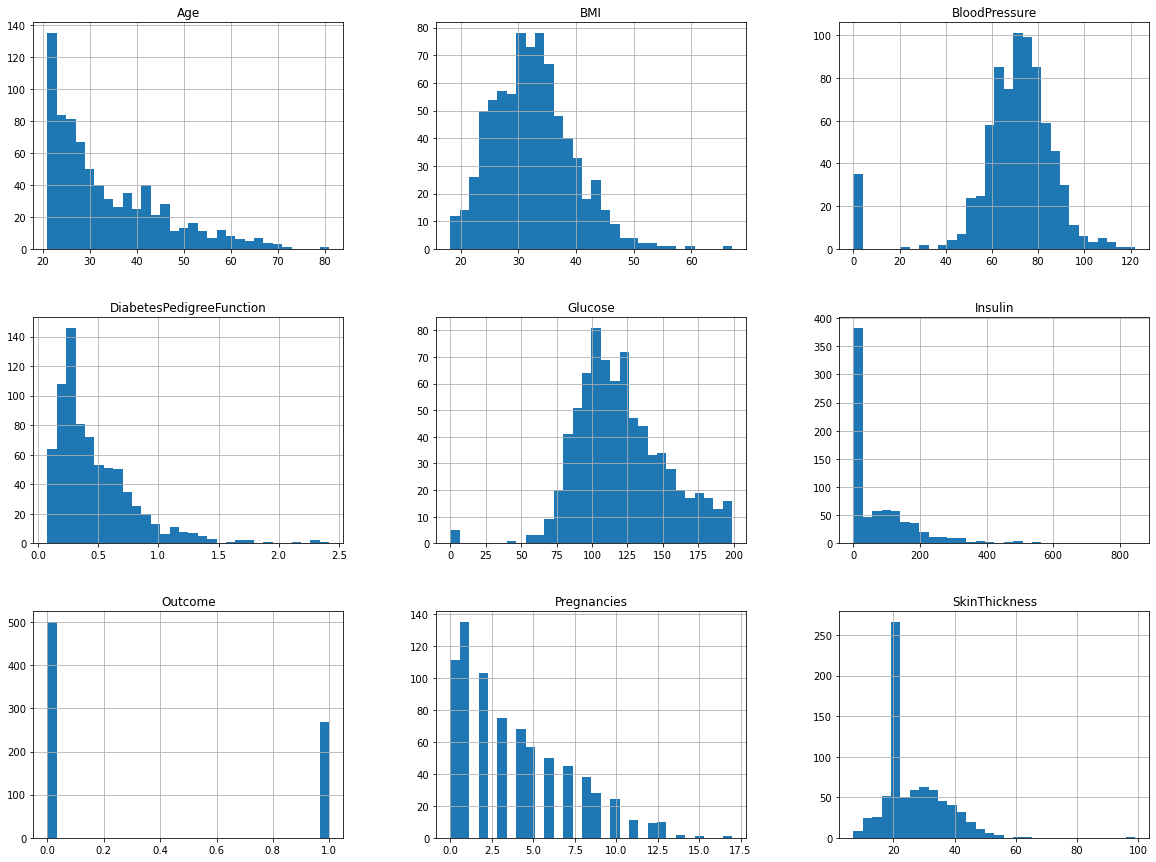

In [39]:
data.hist(bins=30,figsize=(20,15))
plt.show()

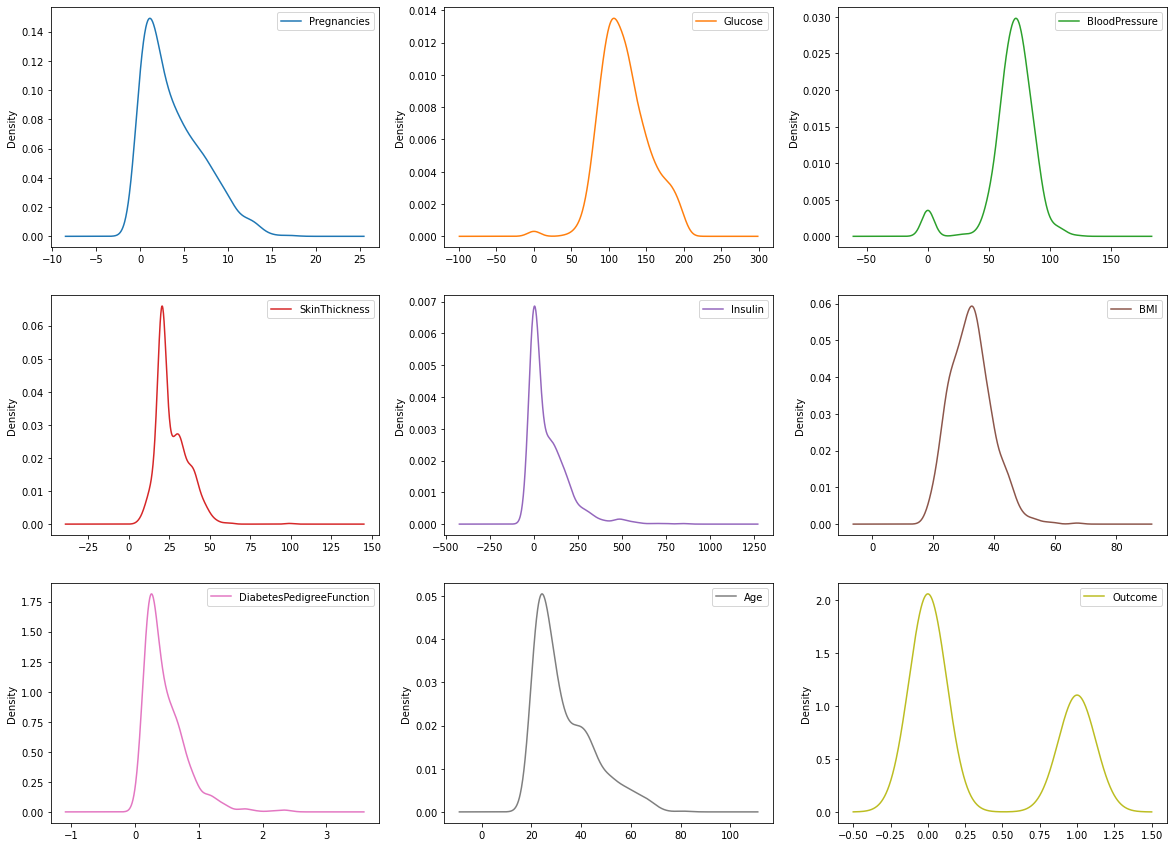

In [40]:
# Density plots for all attributes to visualize the distribution of each attribute
data.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

##### Bell shape curve: Blood Pressure
##### Right-Skewed: Age, Insulin, Pregnancies,  Diabetes Pedigree Function

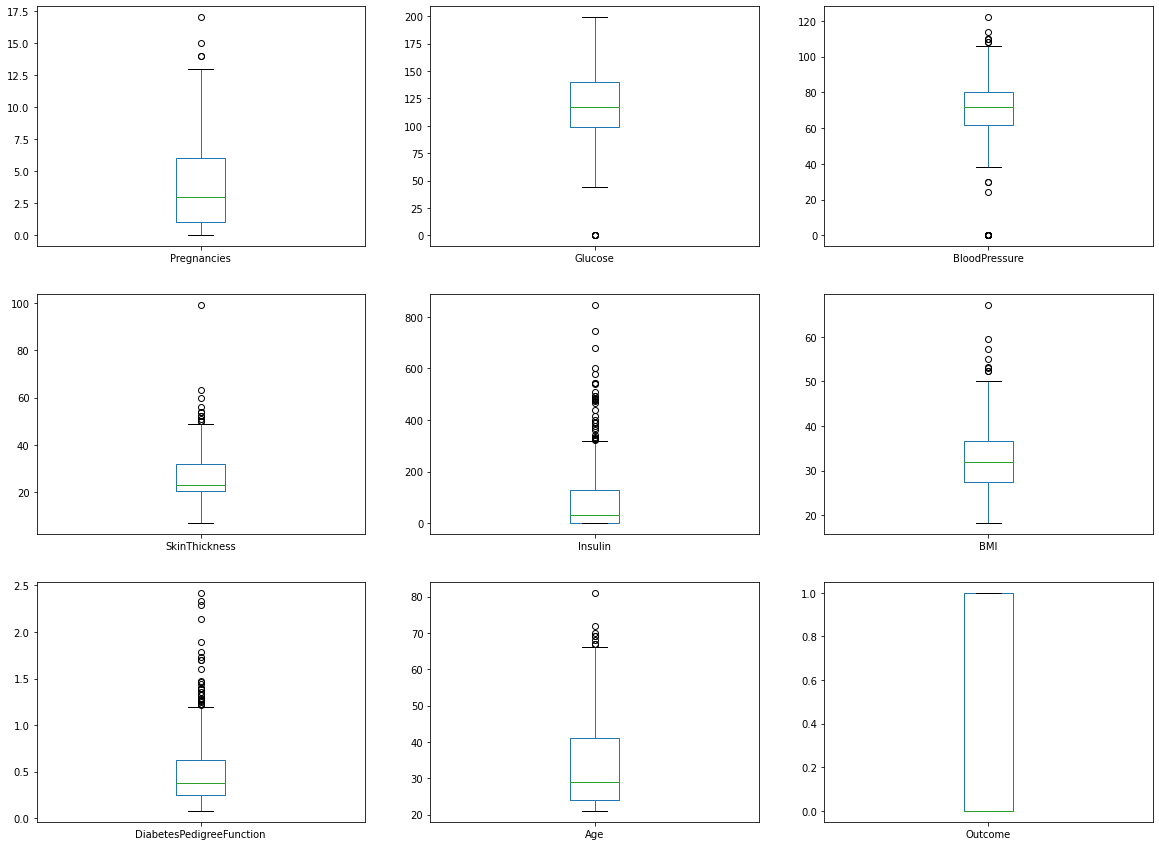

In [42]:
data.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))
plt.show()

##### Short IQR: insulin, Diabetes Pedigree Function, Blood Pressure and BMI
##### At least 75% of the women:
+ are 25 years old or older
+ have BMI nearly 30 kg/m2
+ have insulin level 100 or more
+ have 1 or more pregnancies
+ have glucose level of 100 mg/dL or more
+ have blood pressure of 60 mmHg or more 

### Correlation

In [43]:
corr_matrix_pearson = data.corr()
corr_matrix_pearson

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.013376,-0.073535,0.021546,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.145378,0.331357,0.218814,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.180890,0.088933,0.184252,0.041265,0.239528,0.065068
SkinThickness,0.013376,0.145378,0.180890,1.000000,0.286469,0.535703,0.154961,0.026423,0.175026
Insulin,-0.073535,0.331357,0.088933,0.286469,1.000000,0.185365,0.185071,-0.042163,0.130548
BMI,0.021546,0.218814,0.184252,0.535703,0.185365,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.154961,0.185071,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.026423,-0.042163,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.175026,0.130548,0.312254,0.173844,0.238356,1.000000


#### There are no strong correlation between the features. The 'strongest' ones are the following (as expected):
+ Age x pregnancies (0.68) - Older women tend to have higher number of pregnancies
+ Glucose x insulin (0.58)
+ Glucose x outcome (0.52) - Women that have higher level of glucose tend to have higher level of insulin and have DM 
+ Skin fold thickness x BMI (0.66)  - Women with higher skin fold thickness value have higher BMI (and probably are overweight/obese)

##### Negative correlation:
+ BMI x Pregnancies (-0.025)
+ Blood Pressure x Diabetes Pedigree Function (-0.016)

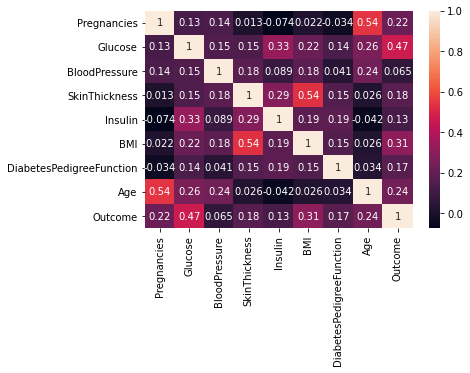

In [44]:
sns.heatmap(corr_matrix_pearson, annot = True)
plt.show()

### KNN Classifier

In [45]:
classifier_inputs = data[['Glucose', 'Insulin', 'SkinThickness', 'BMI', 'Age']]
classifier_output = data['Outcome']

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)

In [47]:
knn.fit(classifier_inputs,classifier_output)

KNeighborsClassifier()

In [48]:
(knn.predict(classifier_inputs) == classifier_output).sum()

621

In [49]:
classifier_output.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [50]:
#test-train
c_inputs_train, c_inputs_test, c_outputs_train, c_outputs_test = mod.train_test_split(classifier_inputs,classifier_output, test_size =0.33)

In [51]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(c_inputs_train,c_outputs_train)

KNeighborsClassifier()

In [52]:
(knn2.predict(c_inputs_test) == c_outputs_test).sum()

186

In [53]:
c_outputs_test.value_counts()

0    163
1     91
Name: Outcome, dtype: int64

In [54]:
c_outputs_pred = knn.predict(c_inputs_test)
accuracy = metrics.accuracy_score(c_outputs_test, c_outputs_pred)
round(accuracy)

1.0

#### Accuracy for KNN model is  0.81

In [55]:

# 10-fold cross-validation with knn = 5
scores = cross_val_score (knn,classifier_inputs, classifier_output, cv =10, scoring = 'accuracy')
scores

array([0.68831169, 0.72727273, 0.67532468, 0.63636364, 0.72727273,
       0.75324675, 0.68831169, 0.83116883, 0.75      , 0.69736842])

In [56]:
scores.mean()

0.7174641148325359

# Optimal value of k 

In [57]:
k_range = range(1,41)
k_scores = []

In [58]:
for k in k_range:
    knn = nei.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score (knn, classifier_inputs, classifier_output, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())

In [66]:
k_scores

[0.7070061517429937,
 0.7030758714969242,
 0.7122351332877649,
 0.7148496240601504,
 0.7174641148325359,
 0.7291866028708134,
 0.7408749145591251,
 0.7253075871496923,
 0.7369446343130553,
 0.7369446343130553,
 0.7578092959671908,
 0.7434894053315106,
 0.7370129870129871,
 0.7474367737525631,
 0.7396103896103896,
 0.7383629528366371,
 0.7370813397129187,
 0.7383458646616542,
 0.7370471633629528,
 0.7318523581681476,
 0.7396958304853042,
 0.7318865345181134,
 0.7383629528366371,
 0.73703007518797,
 0.7370813397129187,
 0.7370642515379358,
 0.7384142173615859,
 0.7422590567327411,
 0.7396616541353385,
 0.7435919343814081,
 0.7422932330827068,
 0.7448906356801095,
 0.747488038277512,
 0.7474880382775121,
 0.7539986329460013,
 0.7488038277511962,
 0.7462064251537937,
 0.7462064251537937,
 0.7409945317840055,
 0.7331339712918661]

Text(0, 0.5, 'Cross-validation accuracy')

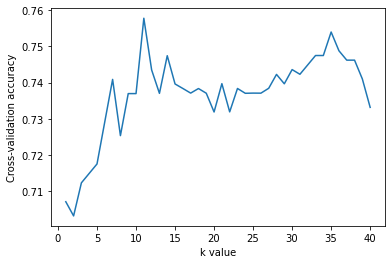

In [59]:
#Visualise best k number

plt.plot(k_range, k_scores)
plt.xlabel ('k value')
plt.ylabel('Cross-validation accuracy')

In [60]:

# Optimal value for k is 10

knn = nei.KNeighborsClassifier(n_neighbors=10)
knn.fit(c_inputs_train, c_outputs_train)

KNeighborsClassifier(n_neighbors=10)

In [61]:
(knn.predict(c_inputs_test) == c_outputs_test).sum()

188

In [62]:
outputs_pred2 = knn.predict(c_inputs_test)
accuracy = metrics.accuracy_score(c_outputs_test, outputs_pred2)
accuracy 

0.7401574803149606

#### Accuracy for KNN model is  0.68

# Logistic Regression


In [63]:
lg = LogisticRegression()

In [64]:
lg_accuracy = cross_val_score(lg,classifier_inputs,classifier_output,cv=10,scoring='accuracy')

In [65]:
lg_accuracy.mean()

0.7643711551606288

In [66]:
lg.fit(c_inputs_train,c_outputs_train)

LogisticRegression()

In [67]:
outputs_pred3=lg.predict(c_inputs_test)
accuracy_lg = metrics.accuracy_score(c_outputs_test, outputs_pred3)
accuracy_lg

0.7716535433070866

#### Accuracy for Logistic Regression model is  0.74

In [68]:
conf_mtx_lg = metrics.confusion_matrix(c_outputs_test, outputs_pred3)
conf_mtx_lg

array([[144,  19],
       [ 39,  52]], dtype=int64)

# Naive Byes

In [69]:
mnb = MultinomialNB()
mnb.fit(c_inputs_train, c_outputs_train)
out_pred4 = mnb.predict(c_inputs_test)
accuracy_mnb = accuracy_score(c_outputs_test, out_pred4)
accuracy_mnb

0.6062992125984252

#### Accuracy for Naive Byes model is  0.57

In [70]:
conf_mtx_nb = metrics.confusion_matrix(c_outputs_test, out_pred4)
conf_mtx_nb

array([[122,  41],
       [ 59,  32]], dtype=int64)

# Decision Tree Classifier

In [71]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(c_inputs_train,c_outputs_train)
out_pred5 = DT_classifier.predict(c_inputs_test)
accuracy_DT = accuracy_score(c_outputs_test,out_pred5)
accuracy_DT

0.7007874015748031

#### Accuracy for Decision Tree classifier model is  0.66

In [72]:
conf_mtx_DT = metrics.confusion_matrix(c_outputs_test, out_pred5)
conf_mtx_DT

array([[120,  43],
       [ 33,  58]], dtype=int64)